In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def generating_function(x):
    return 2 * x - 3

num_samples = 30

x_training = np.sort(10 * np.random.rand(num_samples))
y_training = generating_function(x_training) + np.random.rand(num_samples)

In [3]:
for x, y in zip(x_training[:10], y_training[:10]):
    print('input = {0:.3f}, output = {1:.3f}'.format(x, y))

input = 0.394, output = -1.660
input = 0.795, output = -1.095
input = 0.998, output = -0.529
input = 1.160, output = -0.149
input = 1.560, output = 0.888
input = 1.937, output = 1.702
input = 2.166, output = 1.929
input = 2.932, output = 3.256
input = 3.045, output = 3.355
input = 3.592, output = 5.156


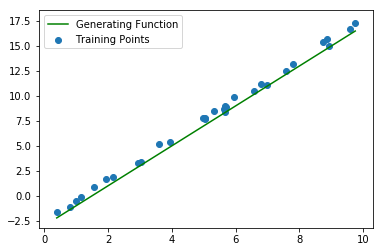

In [4]:
plt.plot(x_training, generating_function(x_training), 'green', label='Generating Function')
plt.scatter(x_training, y_training, label='Training Points')
plt.legend(loc="best")
plt.show()

In [5]:
model = LinearRegression()
model.fit(x_training[:, np.newaxis], y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

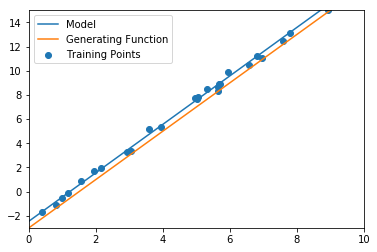

In [6]:
x_test = np.linspace(0, 10, 100)
y_test = model.predict(x_test[:, np.newaxis])
y_actual = generating_function(x_test)
plt.plot(x_test, y_test, label="Model")
plt.plot(x_test, y_actual, label="Generating Function")
plt.scatter(x_training, y_training, label="Training Points")
plt.xlim((0, 10))
plt.ylim((-3, 15))
plt.legend(loc="best")
plt.show()

In [7]:
print(model.coef_, model.intercept_)

[ 2.00419299] -2.45064464124


In [8]:
# MAE
y_training_pred = model.predict(x_training[:, np.newaxis])
mean_absolute_error(y_training, y_training_pred)

0.20882165266252831

In [9]:
# MAE test set
mean_absolute_error(y_actual, y_test)

0.57032028417873226

In [10]:
# MSE
mean_squared_error(y_training, y_training_pred)

0.066399744804945426

In [11]:
mean_squared_error(y_actual, y_test)

0.32541469569682924

In [13]:
# Training R^2
print(model.score(x_training[:, np.newaxis], y_training))

0.997796246429


0.99043087479


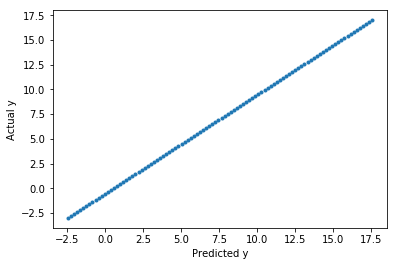

In [15]:
# Test R^2
print(model.score(x_test[:, np.newaxis], y_actual))

plt.scatter(y_test, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()